<a href="https://colab.research.google.com/github/GildasTaliah/Fin_Analysis-Mod_with_py/blob/main/MarketValOfDebt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Estimating MARKET VALUE OF DEBT**



---



# Bond Valuation
## Intro

Valuation refers to the process of determining the fair value of a financial instrument. There are two main types of financial instrument in the financial markets namely cash instrument such as bonds and stocks, and derivatives. Valuation of each financial instruments requires different sets of quantitative tools.


Government and Private institutions often gain acces to capital by borrowing money to fund their projects. In doing so, they often create a **debt security** such as government or corporate bonds. These bonds are the most common types of **fixed income or debt instrument**.

**Time Value of Money**: The concept of time value of money is centered on the idea that a euro tooday is worth more than a euro tomorrow. Suppose we won €10_000 in a game, what would we choose: receive €10_000 at the *pressent* time or 10_000 euros in the *future*, say one year from now ?

$\quad$

With knowlege of time value of money, we'd undoubtedly choose the first option. We would prefer €10_000 today, to this end we would have to be compensated to agree to receive the cash in the future.

Taking €10_000 to be the present value (pv), and considering an interest rate (r), the future value (fv) one, two years from now can be calculated as:

In [14]:
# consider r --> 2.5555%
pv: int = 10_000
r: float = 0.02555

fv1 = pv * (1+r)
print(f'Future Value one year from now {fv1:_.2f}')
print()
fv2 = pv * (1+r) * (1+r)
print(f'Future Value two years from now {fv2:_.2f}')

Future Value one year from now 10_255.50

Future Value two years from now 10_517.53


From the future values we can deduce the present values given the intrest rate.

In [9]:
pv1 = fv1 / (1+r)
print(f'Present Value is:  {pv1:_.2f} from future value: {fv1:_.2f}, one year away')
print()
pv2 = fv2 / ((1+r) * (1+r))
print(f'Present Value is:  {pv2:_.2f} from future value: {fv2:_.2f}, two years away')

Present Value is:  10_000.00 from future value: 10_255.50, one year away

Present Value is:  10_000.00 from future value: 10_517.53, two years away


$\quad$

## Problem Statement
We have understood the concep of time value of money,  and now we want to apply these concept in obtaining the fair value of bonds.

When an investors buys a bond they are essentially lending money to the issuer in exchange of periodic interest payments (coupons) and the return of the principal amounts.  Below we outline some characteristics of bonds.

**_Characteristics of Bonds_**

- **Principal/Face Value**: The nominal value of the bond that is repaid to the investor at maturity.

- **Maturity Date**: The date when the principal amount of the bond becomes due and payable to the investor/bonholder.

- **Coupond Rate**: The fixed or variable interest rate, paid periodically to bondholders/investors based on the bonds face value.

- **Yield**: The rate of return earned by on a bond, taking into account its current market price and the coupon payments.

Other characteristics include: the **credit ratings, liquidity, convertibility, callability, seniority** of the bond etc.


**Bonds investor's trade-off**:

From the perspective of the investor/bondholder, let us look at the life cycle of a €100 bond, with coupon rate 5%, and life span 5 years.

Year (t): $\,$ $\,$ $\,$  $\,$  $\,$  $\,$  $\,$ $\,$ $\,$ $\,$ $\,$ $\,$ $\,$ $\,$    $0$   $\,$ $\,$ $\,$ $1$ $\,$ $\,$ $\,$ $\,$   $2$ $\,$ $\,$ $\,$    $3$ $\,$ $\,$ $\,$    $4$  $\,$ $\,$ $\,$$\,$    $5$
$\quad$

Cash InFlow: $\,$  $\,$  $\,$ $\,$$\,$ $\,$$\,$ $\,$  $\,$ $\,$ $\,$ $\_$ $\,$         $\,$ $\,$   $5$  $\,$   $\,$$\,$ $\,$  $5$   $\,$    $\,$$\,$ $\,$ $5$   $\,$$\,$ $\,$   $5$ $\,$$\,$ $\,$  $105$
$\quad$

Cash OutFlow: $\,$ $\,$ $\,$ $\,$$\,$ $\,$  $-100$   $\,$ $\,$  $\_$  $\,$ $\,$ $\,$  $\,$    $\_$ $\,$ $\,$ $\,$ $\,$  $\_$  $\,\,$   $\,\,$ $\_$   $\,\,$    $\,\,$ $\_$

**Value of Bond**

In general the value (V) of an assset equals the sum of the present value of it's expected cash flows.

$$V = \sum_{t=1}^{T} \frac{CF_{t}}{(1 + r_{y})^{t}}$$

Where $CF_{t}$ is the cash flow at time $t$, $t \in T$. $ \,r_{y}$ is the discount rate or the yield.

$\quad$


Laying out a bond's cash flow, prior to maturity the investor receives cash flows/coupon $(C)$ payments:

$$\sum_{t=1}^{T-1} \frac{C_{t}}{(1 + r_{y})^{t}}$$

At maturity, the investor receives the last coupon payment $(C_{T})$ and the principal amount (P). This give rise to the value of the bond computed as:

$$V = \sum_{t=1}^{T-1} \frac{C_{t}}{(1 + r_{y})^{t}} +  \frac{C_{T} + P}{(1 + r_{y})^{T}} $$

Now let us define a custom function to carry out this task.

In [169]:
# Bond Valuation function
import pandas as pd
import numpy as np

def bond_val(p: int, cr: float, ttm: int,  yr: float) -> float:
  '''
  Input: Principal, Coupon Rate, Time to Maturity, Yield.

  Returns: pandas series with present value of bond.
  '''
  # succesive coupon payments and final coupon with principal
  cf = np.append(np.repeat(p * cr, ttm - 1), p * (1 + cr))
  cf = pd.DataFrame(cf, columns=['cashflow'])

  # create Time range, and compute present value of cash flows.
  cf['t'] = range(1, len(cf) + 1)
  cf['pv_factor'] = 1 / (1 + yr) ** cf['t']
  cf['pv'] = cf['cashflow'] * cf['pv_factor']

  # return sum of present values
  return cf.pv.sum().round(4) # cf

In [170]:
pv = bond_val(100, 0.05, 5, 0.05)
print(f'Sum of Cash Flows: {pv}')

Sum of Cash Flows: 100.0


## Sensitivity Analysis

Let us analyse what happens to the present value, when we alternate through diffrent values of underlying bond characteristics.



In [162]:
## Create a sample DataFrame with bond data,
# Increasing coupon with everything constant
bond_data_c = pd.DataFrame({
    'p':   [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
    'cr':  [0.025, 0.03, 0.05, 0.065, 0.07, 0.085, 0.09, 0.105, 0.115, 0.12],
    'ttm': [5, 5, 5, 5, 5, 5, 5, 5, 5,  5],
    'yr':  [0.035, 0.035, 0.035, 0.035, 0.035, 0.035,  0.035, 0.035, 0.035, 0.035]
})

In [163]:
# Create a sample DataFrame with bond data,
# Increasing maturity with everything constant.
bond_data_m = pd.DataFrame({
    'p':   [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
    'cr':  [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,  0.05, 0.05, 0.05, 0.05],
    'ttm': [1.5, 3.5, 5, 7.5, 10, 12.5, 15, 17.5,  20, 25],
    'yr':  [0.035, 0.035, 0.035, 0.035, 0.035, 0.035,  0.035, 0.035, 0.035, 0.035]
})

In [164]:
# Create a sample DataFrame with bond data,
# Increasing yield with everything constant.
bond_data_y = pd.DataFrame({
    'p':   [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
    'cr':  [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,  0.05, 0.05, 0.05, 0.05],
    'ttm': [5, 5, 5, 5, 5, 5, 5, 5, 5,  5],
    'yr':  [0.015, 0.03, 0.035, 0.055, 0.06, 0.065,  0.07, 0.075, 0.08, 0.0825]
})

In [171]:
bond_data_c

,p,cr,ttm,yr,pv_cr,pv_ttm,pv_yr
0,100,0.025,5,0.035,95.4849,101.4493,116.7393
1,100,0.030,5,0.035,97.7425,104.2025,109.1594
2,100,0.050,5,0.035,106.7726,106.7726,106.7726
3,100,0.065,5,0.035,113.5452,109.1718,97.8649
4,100,0.070,5,0.035,115.8027,112.4749,95.7876
5,100,0.085,5,0.035,122.5753,114.4950,93.7665
6,100,0.090,5,0.035,124.8328,117.2761,91.7996
7,100,0.105,5,0.035,131.6054,118.9770,89.8853
8,100,0.115,5,0.035,136.1204,121.3186,88.0219
9,100,0.120,5,0.035,138.3779,124.7223,87.1087


In [166]:
# Obtain different scenario values
bond_data_c['pv_cr'] = bond_data_c.apply(lambda row: bond_val(row['p'], row['cr'], row['ttm'], row['yr']), axis=1)
bond_data_c['pv_ttm'] = bond_data_m.apply(lambda row: bond_val(row['p'], row['cr'], row['ttm'], row['yr']), axis=1)
bond_data_c['pv_yr'] = bond_data_y.apply(lambda row: bond_val(row['p'], row['cr'], row['ttm'], row['yr']), axis=1)
bond_data_c[['pv_cr', 'pv_ttm', 'pv_yr']]

,pv_cr,pv_ttm,pv_yr
0,95.4849,101.4493,116.7393
1,97.7425,104.2025,109.1594
2,106.7726,106.7726,106.7726
3,113.5452,109.1718,97.8649
4,115.8027,112.4749,95.7876
5,122.5753,114.4950,93.7665
6,124.8328,117.2761,91.7996
7,131.6054,118.9770,89.8853
8,136.1204,121.3186,88.0219
9,138.3779,124.7223,87.1087


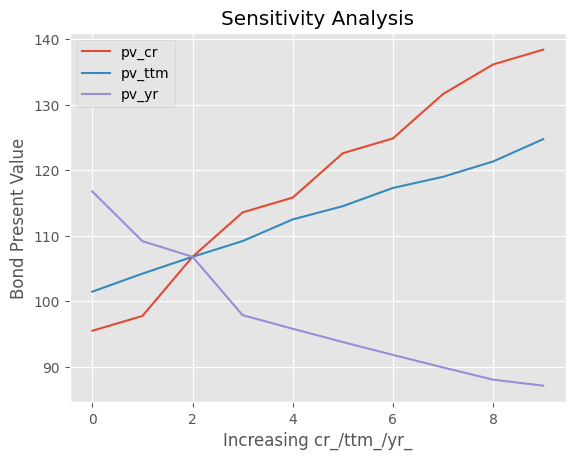

In [167]:
ax = bond_data_c[['pv_cr', 'pv_ttm', 'pv_yr']].plot()

# Plot the DataFrame
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Set the title and axis labels
ax.set_title('Sensitivity Analysis')
ax.set_xlabel('Increasing cr_/ttm_/yr_')
ax.set_ylabel('Bond Present Value')
# Turn off the x-axis
#ax.get_xaxis().set_visible(False)

# Display the plot
plt.show()

 Conclusion: **Present value of a bond is very sensitive to yield and share an inverse relationship with yied**. Elsewhere, the present value has a positive relationship with increasing  time to maturity and increasing coupon rate for the same principal amount.  



$\quad$
$\quad$




$\quad$
$\quad$

# Market Value of Debt





In this section of bond valuation, we want to determine the  financial market value of debts.

Let us assume on Company's A balance sheet, the total value of debt is €1_000_000, the interest expense is €60_000 and the cost of debt is 8%.

In [220]:
# Parameters
total_book_debt: int = 1_000_000
interest_expense: int = 60_000
cost_of_debt: float = 0.08

print(f'Hypothetical Market Value of Company A Debt: {total_book_debt:_}\n')

# with above coupon rate
coupon_rate = interest_expense / total_book_debt
print(f'coupon rate of debt: {coupon_rate}')

Hypothetical Market Value of Company A Debt: 1_000_000

coupon rate of debt: 0.06


In [221]:
''' If we assume maturity of 5 years we obtain the resulting cash flows as follow
'''
principal = total_book_debt
coupon_payment = coupon_rate * principal
print(f'Coupon payment: {coupon_payment}\n')

maturity = 5
cash_flows = [coupon_rate * principal for i in range(maturity - 1)] + [(1 + coupon_rate) * principal]
cash_flows

Coupon payment: 60000.0



[60000.0, 60000.0, 60000.0, 60000.0, 1060000.0]

In [175]:
#pip install numpy_financial

In [173]:
import numpy_financial as npf

# Calculate NPV
npv = npf.npv(cost_of_debt, [0] + cash_flows)
print(f"{'Using Numpys npv function':|^5}")
print(f' Market Value of Debt: {npv:_.4f}')

print(f"{'-':|^5}")

# Using our predefined function
pv = bond_val(total_book_debt, coupon_rate, 5, cost_of_debt)
print(f"{'Using our predefined function':|^5}")
print(f' Market Value of Debt: {pv:_}')

Using Numpys npv function
 Market Value of Debt: 920_145.7993
||-||
Using Predefined function pv
 Market Value of Debt: 920_145.7993


Another way would be through the formula:

$$V = C (\frac{1 - (1 + r_y)^{-t}}{r_y}) + \frac{P}{(1 + r_y)^t} $$

In [178]:
market_value_debt = coupon_payment * ((1 - (1 + cost_of_debt)**(-maturity))/cost_of_debt) + principal/(1 + cost_of_debt)**maturity
market_value_debt

920145.7992584382

Let us consider a certain company Matts Blessed PLC with a total capital of 50_000_000 and the following sets of debts, with their reported characteristics. We want to obtain the market value of debts for this company.

In [219]:
# Dataframe of debts
debts = pd.DataFrame({
    'principal':        [200_000, 5_000_000, 100_0000, 300_000, 10_500_000],
    'coupon rate':      [0.07, 0.025, 0.03, 0.08, 0.04] ,
    'maturity (years)': [ 5, 3, 6, 4, 8]
})
debts

,principal,coupon rate,maturity (years)
0,200000,0.070,5
1,5000000,0.025,3
2,1000000,0.030,6
3,300000,0.080,4
4,10500000,0.040,8


In [222]:
''' Assume interest expense of 950_000 each year
'''
# cost of debt
cod: float = 950_000 / debts.principal.sum()
cod

debts['cod'] = cod
debts

,principal,coupon rate,maturity (years),cod
0,200000,0.070,5,0.055882
1,5000000,0.025,3,0.055882
2,1000000,0.030,6,0.055882
3,300000,0.080,4,0.055882
4,10500000,0.040,8,0.055882


In [224]:
debts['value'] = debts.apply(lambda row: bond_val(row['principal'], row['coupon rate'], row['maturity (years)'], row['cod']), axis=1)
debts

,principal,coupon rate,maturity (years),cod,value
0,200000,0.070,5,0.055882,2.120282e+05
1,5000000,0.025,3,0.055882,4.584091e+06
2,1000000,0.030,6,0.055882,8.710648e+05
3,300000,0.080,4,0.055882,3.253093e+05
4,10500000,0.040,8,0.055882,9.447336e+06


In [225]:
# Total Market value of debts
print(f'Total Capital: 50_000_000\n')
print(f' Total Value of Debts: {debts.value.sum():_.4f}\n')

print(f' Total Value of Equity: {50_000_000 - debts.value.sum():_.4f}\n')

print(f' Gearing Ratio: {debts.value.sum() / 50_000_000}')

Total Capital: 50_000_000

 Total Value of Debts: 15_439_829.1335

 Total Value of Equity: 34_560_170.8665

 Gearing Ratio: 0.30879658267000004


In [ ]:
# The END !!!

# References

- [DataCamp Course: Bond Valuation in R](https://app.datacamp.com/learn/courses/bond-valuation-and-analysis-in-r)

- [Nick DeRobertis: Financial Modelling Course](https://nickderobertis.github.io/fin-model-course/index.html#)